In [1]:
library('ISLR')
library('corrplot')

In [7]:
head(Auto, 5)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino


# Question 8

In [7]:
lm.fit =lm(mpg~horsepower, data=Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


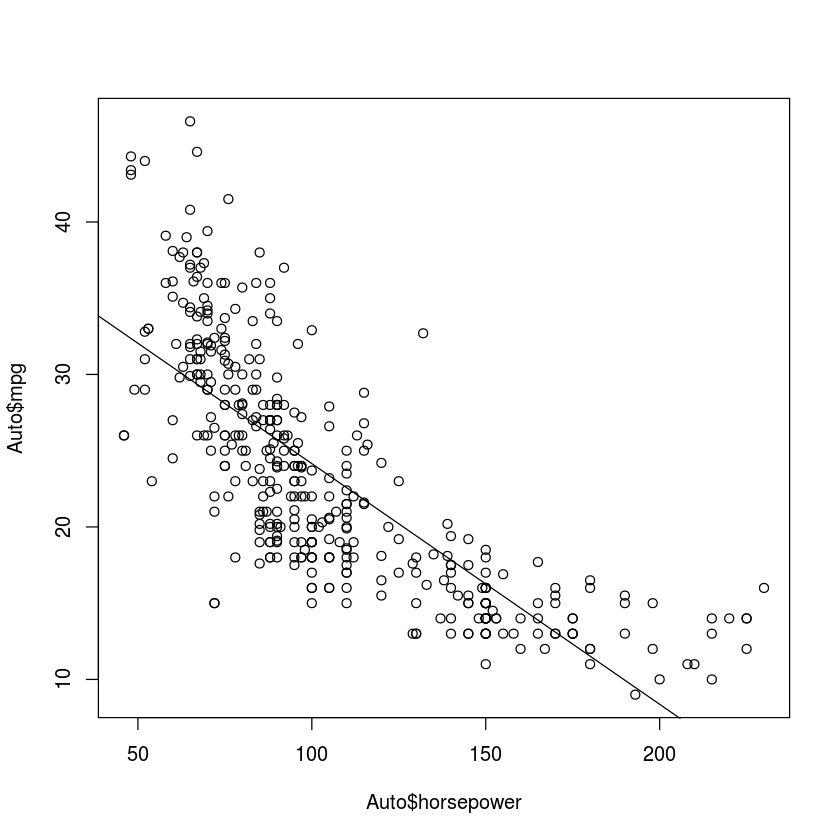

In [8]:
plot(Auto$horsepower, Auto$mpg)
abline(lm.fit)

In [22]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),38.525212,41.3465103
horsepower,-0.170517,-0.1451725


* **i Yes, the t value and Pr clearly indicate there is.**
* **ii  Very strong.**
* **iii Negative, in other words higher horsepower is associated with lower MPG.**
* **iv See below.**

In [25]:
predict(lm.fit, data.frame(horsepower = 9), interval = "confidence")

,fit,lwr,upr
1,38.51526,37.21105,39.81947


# Question 9

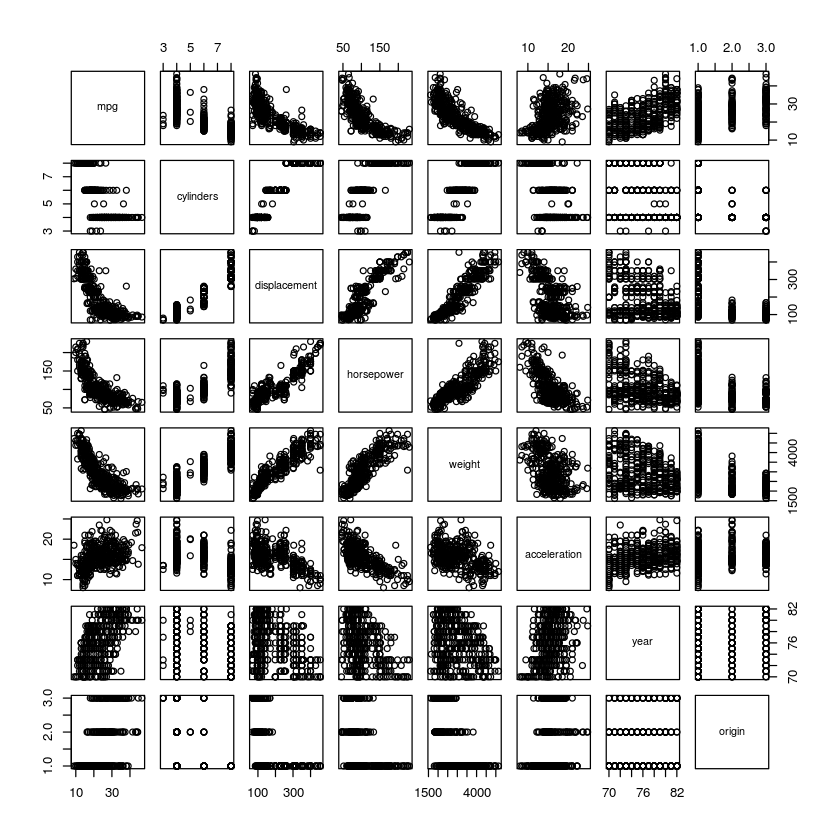

In [27]:
pairs(Auto[,-9])

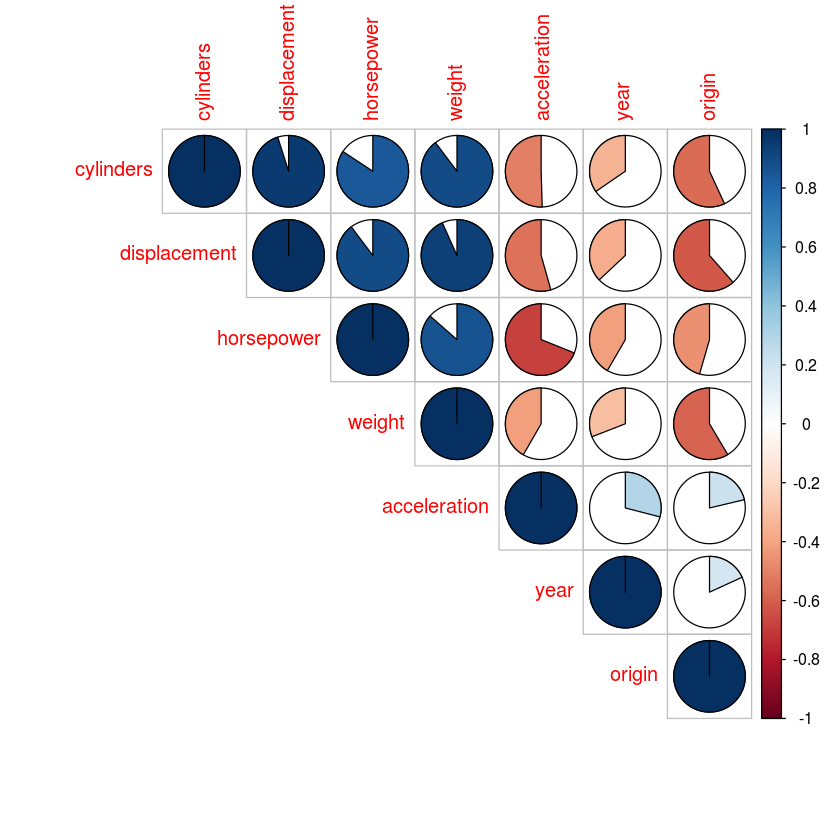

In [32]:
A <- cor(Auto[,2:8])
corrplot(A, method='pie', type='upper')

In [17]:
# origin is factor rather than numeric feature
lm.fit = lm(mpg~cylinders + displacement + horsepower + 
            weight + acceleration + year + factor(origin), data = Auto)

In [18]:
summary(lm.fit)


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + weight + 
    acceleration + year + factor(origin), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0095 -2.0785 -0.0982  1.9856 13.3608 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.795e+01  4.677e+00  -3.839 0.000145 ***
cylinders       -4.897e-01  3.212e-01  -1.524 0.128215    
displacement     2.398e-02  7.653e-03   3.133 0.001863 ** 
horsepower      -1.818e-02  1.371e-02  -1.326 0.185488    
weight          -6.710e-03  6.551e-04 -10.243  < 2e-16 ***
acceleration     7.910e-02  9.822e-02   0.805 0.421101    
year             7.770e-01  5.178e-02  15.005  < 2e-16 ***
factor(origin)2  2.630e+00  5.664e-01   4.643 4.72e-06 ***
factor(origin)3  2.853e+00  5.527e-01   5.162 3.93e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.307 on 383 degrees of freedom
Multiple R-squared:  0.8242,	Adjusted R-squar

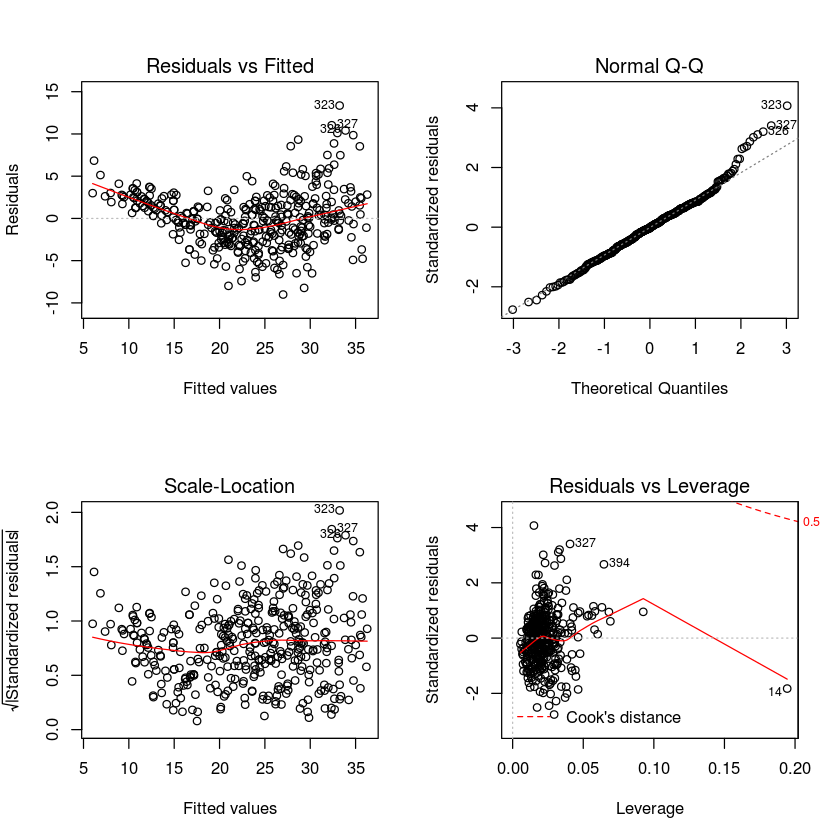

In [26]:
par(mfrow=c(2,2))
plot(lm.fit)

In [19]:
# square displacement, horsepower and weight
lm.fit2 = lm(mpg~cylinders + displacement + I(displacement^2) + 
             horsepower + I(horsepower^2) + weight + I(weight^2) 
             + acceleration + year + factor(origin), data = Auto)

In [20]:
summary(lm.fit2)


Call:
lm(formula = mpg ~ cylinders + displacement + I(displacement^2) + 
    horsepower + I(horsepower^2) + weight + I(weight^2) + acceleration + 
    year + factor(origin), data = Auto)

Residuals:
   Min     1Q Median     3Q    Max 
-8.939 -1.604 -0.006  1.475 12.101 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.321e+00  4.816e+00   0.689 0.490942    
cylinders          3.466e-01  3.321e-01   1.044 0.297332    
displacement      -2.674e-02  2.133e-02  -1.253 0.210822    
I(displacement^2)  5.243e-05  3.587e-05   1.462 0.144669    
horsepower        -1.855e-01  4.127e-02  -4.494 9.28e-06 ***
I(horsepower^2)    5.112e-04  1.390e-04   3.678 0.000269 ***
weight            -1.156e-02  2.702e-03  -4.280 2.37e-05 ***
I(weight^2)        1.146e-06  3.591e-07   3.191 0.001534 ** 
acceleration      -1.630e-01  1.008e-01  -1.617 0.106758    
year               7.825e-01  4.656e-02  16.805  < 2e-16 ***
factor(origin)2    1.137e+00  5.531e-01   

In [22]:
anova(lm.fit, lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
383,4187.392,NA,NA,NA,NA
380,3196.568,3,990.8232,39.26219,4.018059e-22


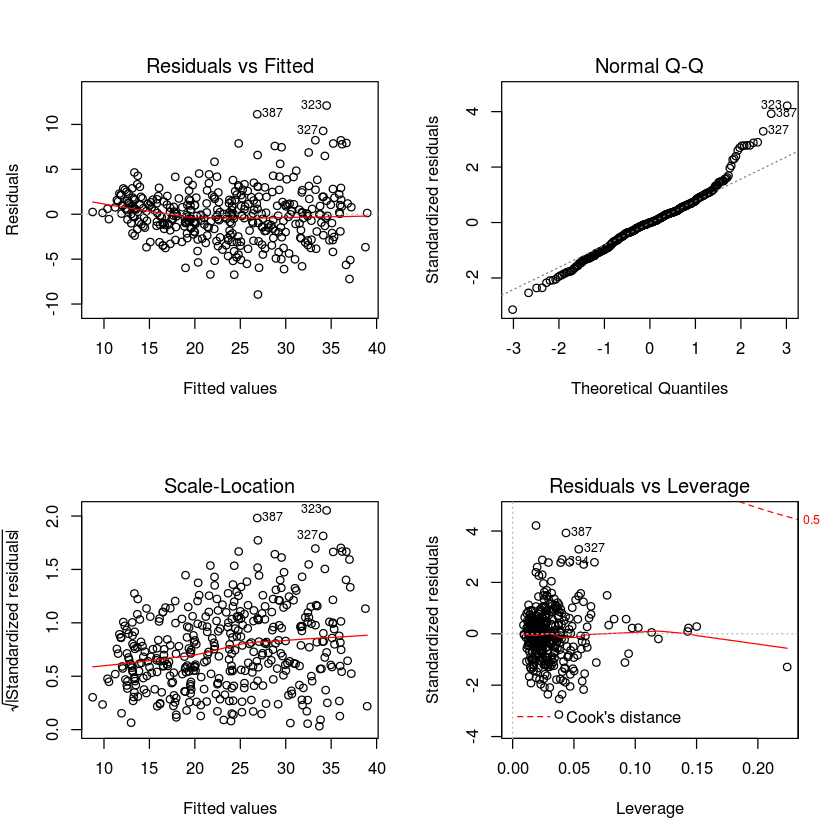

In [25]:
par(mfrow=c(2,2))
plot(lm.fit2)

In [32]:
lm.fit3 = lm(mpg~cylinders * displacement + horsepower + weight  
             + acceleration + year + factor(origin), data = Auto)

In [33]:
summary(lm.fit3)


Call:
lm(formula = mpg ~ cylinders * displacement + horsepower + weight + 
    acceleration + year + factor(origin), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2543  -1.7939   0.0023   1.6137  12.4378 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3.4935841  4.7634096  -0.733  0.46375    
cylinders              -2.6328363  0.4119152  -6.392 4.78e-10 ***
displacement           -0.0726697  0.0146033  -4.976 9.82e-07 ***
horsepower             -0.0473782  0.0133619  -3.546  0.00044 ***
weight                 -0.0053896  0.0006358  -8.477 5.10e-16 ***
acceleration            0.0596253  0.0917157   0.650  0.51601    
year                    0.7726565  0.0483401  15.984  < 2e-16 ***
factor(origin)2         1.3454473  0.5551467   2.424  0.01583 *  
factor(origin)3         1.4580211  0.5477223   2.662  0.00810 ** 
cylinders:displacement  0.0132282  0.0017433   7.588 2.50e-13 ***
---
Signif. codes:  0 ‘*

In [34]:
lm.fit4 = lm(mpg~cylinders + displacement * horsepower + weight  
             + acceleration + year + factor(origin), data = Auto)

In [35]:
summary(lm.fit4)


Call:
lm(formula = mpg ~ cylinders + displacement * horsepower + weight + 
    acceleration + year + factor(origin), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5801 -1.6052 -0.0798  1.4166 12.5839 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.859e+00  4.397e+00  -0.423  0.67277    
cylinders                6.344e-01  3.026e-01   2.096  0.03672 *  
displacement            -7.287e-02  1.141e-02  -6.388 4.88e-10 ***
horsepower              -1.957e-01  2.074e-02  -9.435  < 2e-16 ***
weight                  -3.238e-03  6.650e-04  -4.870 1.64e-06 ***
acceleration            -2.101e-01  9.083e-02  -2.313  0.02127 *  
year                     7.439e-01  4.576e-02  16.258  < 2e-16 ***
factor(origin)2          9.690e-01  5.236e-01   1.850  0.06501 .  
factor(origin)3          1.395e+00  5.065e-01   2.754  0.00616 ** 
displacement:horsepower  5.176e-04  4.916e-05  10.530  < 2e-16 ***
---
Signif. codes:  0 ‘

In [36]:
lm.fit5 = lm(mpg~cylinders + displacement + horsepower * weight  
             + acceleration + year + factor(origin), data = Auto)

In [37]:
summary(lm.fit5)


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower * weight + 
    acceleration + year + factor(origin), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1825 -1.7108 -0.1006  1.5738 12.2334 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.878e+00  4.546e+00   0.413 0.679759    
cylinders         -3.323e-02  2.870e-01  -0.116 0.907897    
displacement       9.097e-03  6.907e-03   1.317 0.188595    
horsepower        -2.293e-01  2.356e-02  -9.733  < 2e-16 ***
weight            -1.132e-02  7.277e-04 -15.557  < 2e-16 ***
acceleration      -8.893e-02  8.822e-02  -1.008 0.314056    
year               7.882e-01  4.574e-02  17.231  < 2e-16 ***
factor(origin)2    1.714e+00  5.078e-01   3.376 0.000811 ***
factor(origin)3    1.686e+00  5.008e-01   3.366 0.000839 ***
horsepower:weight  5.453e-05  5.221e-06  10.446  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard err

In [38]:
lm.fit6 = lm(mpg~cylinders + displacement + horsepower + weight  
             * acceleration + year + factor(origin), data = Auto)

In [39]:
summary(lm.fit6)


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + weight * 
    acceleration + year + factor(origin), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7826 -1.9450 -0.0021  1.6532 12.4624 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -4.393e+01  5.836e+00  -7.528 3.75e-13 ***
cylinders           -2.162e-01  3.063e-01  -0.706 0.480788    
displacement         6.888e-03  7.657e-03   0.900 0.368933    
horsepower          -4.199e-02  1.342e-02  -3.129 0.001891 ** 
weight               3.633e-03  1.638e-03   2.218 0.027146 *  
acceleration         1.599e+00  2.414e-01   6.623 1.19e-10 ***
year                 8.037e-01  4.911e-02  16.364  < 2e-16 ***
factor(origin)2      2.054e+00  5.421e-01   3.789 0.000176 ***
factor(origin)3      2.081e+00  5.347e-01   3.893 0.000117 ***
weight:acceleration -5.717e-04  8.383e-05  -6.820 3.57e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [41]:
lm.fit7 = lm(mpg~cylinders * displacement * horsepower * weight  
             * acceleration + year + factor(origin), data = Auto)

In [42]:
summary(lm.fit7)


Call:
lm(formula = mpg ~ cylinders * displacement * horsepower * weight * 
    acceleration + year + factor(origin), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9341 -1.4089  0.0861  1.4199 12.3454 

Coefficients:
                                                        Estimate Std. Error
(Intercept)                                            1.180e+02  4.178e+02
cylinders                                             -2.744e+01  7.477e+01
displacement                                           1.960e+00  3.061e+00
horsepower                                            -4.004e+00  4.265e+00
weight                                                -1.240e-01  1.377e-01
acceleration                                          -2.384e+01  2.522e+01
year                                                   7.578e-01  4.887e-02
factor(origin)2                                        1.109e+00  5.629e-01
factor(origin)3                                        1.472e+00  5.255e-01
